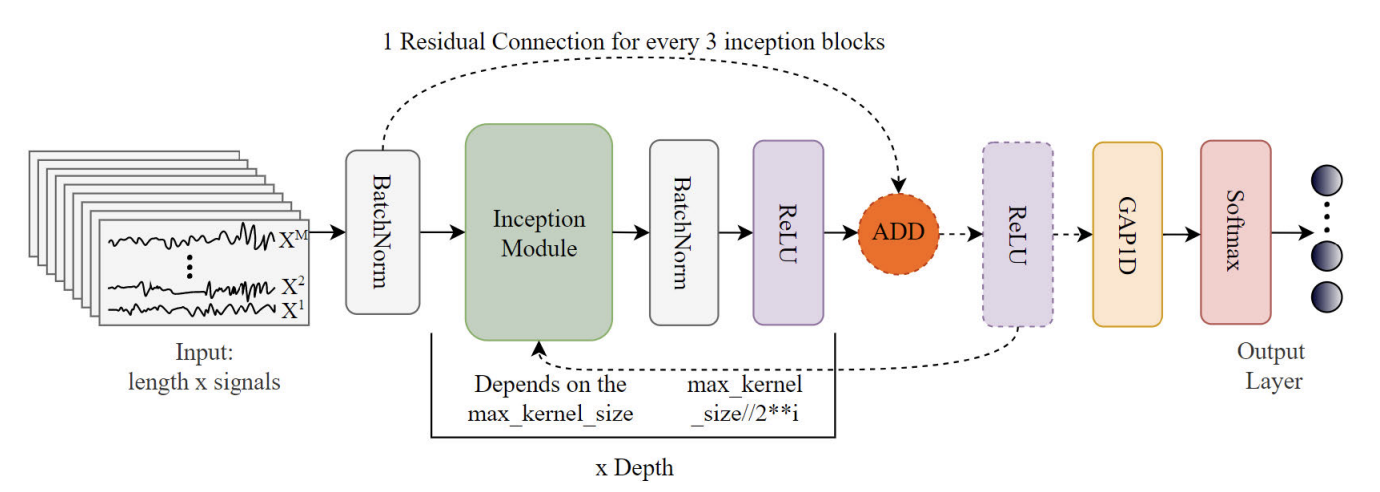

- **Reference**
    - https://github.com/MyungKyuYi/HAR/blob/main/iSPLInception_WISDM_0730.ipynb
    - https://github.com/rmutegeki/iSPLInception
    - https://github.com/healthDataScience/deep-learning-HAR/blob/master/HAR-CNN-Inception.ipynb
    - https://ieeexplore.ieee.org/document/9425494
    - https://archive.ics.uci.edu/dataset/213/emg+physical+action+data+set
    - https://www.ucihealth.org/health-library/content?contentTypeID=92&contentID=P07656&language=en
    - https://www.kaggle.com/code/durgancegaur/emg-dataset
    - https://www.kaggle.com/code/rachit2702/notebook6db9079b5a
    - https://ieeexplore.ieee.org/document/10288050/references#references
    - https://medium.com/analytics-vidhya/analysis-of-emg-physical-data-aggressive-normal-activities-4d5a696730b4
    - https://keras.io/examples/timeseries/timeseries_classification_transformer/
    - https://github.com/MyungKyuYi/HAR/blob/main/Transformer_WISDM_1204.ipynb
    
**IEEE Sensor 저널에 등록된 <iSPLInception: Redefining the State-of-the-Art for Human Activity Recognition>에서 나온 iSLPInception의 구조가 위 figure**이다. iSLPInception은 Inception-ResNet 아키텍처에서 영감을 받아 설계되었으며, 저자의 주장은 이 모델이 높은 예측 정확도를 달성하면서도 적은 장치 자원을 사용한다는 것이다. 

In [30]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.stats import skew
import os
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import numpy as np
import scipy
from tqdm import tqdm

In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# cnn model vary kernel size
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from keras.utils import to_categorical

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPooling1D


---

In [32]:
# data load

df = pd.read_csv("../../data/PAMAP/PAMAP_features.csv")
df

Unnamed: 0  sub_id  activity_id act_level     hr_mean  hr_mean_normal  \
0            3006       2           17     light   87.000000        1.175676   
1            3497       2            4  moderate  124.605469        1.683858   
2           14495       7            5  vigorous  113.493430        1.891557   
3           13278       7           17     light   82.513672        1.375228   
4           14969       8            3     light   73.000000        1.106061   
...           ...     ...          ...       ...         ...             ...   
11768       10708       6            2     light   82.582031        1.376367   
11769        4870       3            2     light   76.998047        1.132324   
11770       11822       6            4  moderate   93.445312        1.557422   
11771        3866       2            7  moderate  129.160156        1.745408   
11772        3450       2           13  moderate  142.234375        1.922086   

         hr_std  hr_std_normal  hand_tmp_mean  hand_tmp_std  ...  \
0      0.000000   7.105427e-15      34.375000      0.000000  ...   
1      0.927920   1.253946e-02      31.875000      0.000000  ...   
2      2.315888   3.859813e-02      32.500000      0.000000  ...   
3      0.492657   8.210948e-03      33.812500      0.000000  ...   
4      0.000000   7.327472e-15      34.437500      0.000000  ...   
...         ...            ...            ...           ...  ...   
11768  0.930285   1.550475e-02      33.525635      0.030741  ...   
11769  0.806906   1.186626e-02      32.083130      0.029390  ...   
11770  0.493415   8.223580e-03      31.750000      0.000000  ...   
11771  0.361877   4.890232e-03      30.465576      0.031088  ...   
11772  1.714464   2.316843e-02      32.173340      0.026163  ...   

       ankle_acc_xz_cor  hand_gyr_xy_cor  hand_gyr_yz_cor  hand_gyr_xz_cor  \
0              0.233251        -0.472662         0.335516        -0.377507   
1             -0.119772        -0.287380        -0.230390        -0.491314   
2              0.025673        -0.265566         0.824691        -0.121345   
3              0.724061        -0.196728         0.315984        -0.380337   
4             -0.001651        -0.060776         0.165672         0.311760   
...                 ...              ...              ...              ...   
11768          0.193950        -0.354026         0.175876        -0.172933   
11769          0.135629         0.056979         0.008235         0.001093   
11770         -0.404942         0.520845        -0.951838        -0.561901   
11771         -0.136336        -0.147614        -0.344375        -0.329746   
11772          0.200755        -0.081262         0.130816        -0.278256   

       chest_gyr_xy_cor  chest_gyr_yz_cor  chest_gyr_xz_cor  ankle_gyr_xy_cor  \
0             -0.290138         -0.779952          0.071855         -0.305959   
1              0.011124         -0.799319         -0.135736         -0.653133   
2             -0.004923         -0.317761         -0.202148         -0.660278   
3              0.284190         -0.109078         -0.071734         -0.177813   
4             -0.272620         -0.014943         -0.191610         -0.261158   
...                 ...               ...               ...               ...   
11768          0.184131         -0.274344         -0.485489         -0.100010   
11769         -0.203294         -0.097797         -0.273316         -0.009717   
11770         -0.169119          0.299434         -0.100683         -0.555866   
11771         -0.024487         -0.536806         -0.161019         -0.752563   
11772         -0.254757         -0.723943         -0.039044         -0.016410   

       ankle_gyr_yz_cor  ankle_gyr_xz_cor  
0             -0.003001         -0.638866  
1             -0.654575          0.391363  
2             -0.528138          0.402147  
3              0.237828         -0.729771  
4              0.066954          0.057685  
...                 ...               ...  
11768      

In [33]:
# 각 feature의 이름
# https://archive.ics.uci.edu/ml/machine-learning-databases/00231/readme.pdf

features_name = {0: 'transient', 1:'lying', 2:'sitting', 3:'standing',
              4:'walking', 5:'running', 6:'cycling', 7:'Nordic walking',
              9:'watching TV', 10:'computer work', 11:'car driving',
              12:'ascending stairs', 13:'descending stairs', 16:'vacuum cleaning',
              17:'ironing', 18:'folding laundry', 19:'house cleaning',
              20:'playing soccer', 24:'rope jumping'}

print (features_name)
print ()
df.info()

{0: 'transient', 1: 'lying', 2: 'sitting', 3: 'standing', 4: 'walking', 5: 'running', 6: 'cycling', 7: 'Nordic walking', 9: 'watching TV', 10: 'computer work', 11: 'car driving', 12: 'ascending stairs', 13: 'descending stairs', 16: 'vacuum cleaning', 17: 'ironing', 18: 'folding laundry', 19: 'house cleaning', 20: 'playing soccer', 24: 'rope jumping'}

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11773 entries, 0 to 11772
Data columns (total 68 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        11773 non-null  int64  
 1   sub_id            11773 non-null  int64  
 2   activity_id       11773 non-null  int64  
 3   act_level         11773 non-null  object 
 4   hr_mean           11773 non-null  float64
 5   hr_mean_normal    11773 non-null  float64
 6   hr_std            11773 non-null  float64
 7   hr_std_normal     11773 non-null  float64
 8   hand_tmp_mean     11773 non-null  float64
 9   hand_tmp_std   

In [34]:
# 결측치 제거

print (df.isnull().sum())

df = df.dropna()

print (df.isnull().sum())

Unnamed: 0          0
sub_id              0
activity_id         0
act_level           0
hr_mean             0
                   ..
chest_gyr_yz_cor    0
chest_gyr_xz_cor    0
ankle_gyr_xy_cor    0
ankle_gyr_yz_cor    0
ankle_gyr_xz_cor    0
Length: 68, dtype: int64
Unnamed: 0          0
sub_id              0
activity_id         0
act_level           0
hr_mean             0
                   ..
chest_gyr_yz_cor    0
chest_gyr_xz_cor    0
ankle_gyr_xy_cor    0
ankle_gyr_yz_cor    0
ankle_gyr_xz_cor    0
Length: 68, dtype: int64


In [35]:
# label encoding

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['activity_id'] = LE.fit_transform(df['activity_id'])
df['act_level'] = LE.fit_transform(df['act_level'])

df

Unnamed: 0  sub_id  activity_id  act_level     hr_mean  hr_mean_normal  \
0            3006       2           10          0   87.000000        1.175676   
1            3497       2            3          1  124.605469        1.683858   
2           14495       7            4          2  113.493430        1.891557   
3           13278       7           10          0   82.513672        1.375228   
4           14969       8            2          0   73.000000        1.106061   
...           ...     ...          ...        ...         ...             ...   
11768       10708       6            1          0   82.582031        1.376367   
11769        4870       3            1          0   76.998047        1.132324   
11770       11822       6            3          1   93.445312        1.557422   
11771        3866       2            6          1  129.160156        1.745408   
11772        3450       2            8          1  142.234375        1.922086   

         hr_std  hr_std_normal  hand_tmp_mean  hand_tmp_std  ...  \
0      0.000000   7.105427e-15      34.375000      0.000000  ...   
1      0.927920   1.253946e-02      31.875000      0.000000  ...   
2      2.315888   3.859813e-02      32.500000      0.000000  ...   
3      0.492657   8.210948e-03      33.812500      0.000000  ...   
4      0.000000   7.327472e-15      34.437500      0.000000  ...   
...         ...            ...            ...           ...  ...   
11768  0.930285   1.550475e-02      33.525635      0.030741  ...   
11769  0.806906   1.186626e-02      32.083130      0.029390  ...   
11770  0.493415   8.223580e-03      31.750000      0.000000  ...   
11771  0.361877   4.890232e-03      30.465576      0.031088  ...   
11772  1.714464   2.316843e-02      32.173340      0.026163  ...   

       ankle_acc_xz_cor  hand_gyr_xy_cor  hand_gyr_yz_cor  hand_gyr_xz_cor  \
0              0.233251        -0.472662         0.335516        -0.377507   
1             -0.119772        -0.287380        -0.230390        -0.491314   
2              0.025673        -0.265566         0.824691        -0.121345   
3              0.724061        -0.196728         0.315984        -0.380337   
4             -0.001651        -0.060776         0.165672         0.311760   
...                 ...              ...              ...              ...   
11768          0.193950        -0.354026         0.175876        -0.172933   
11769          0.135629         0.056979         0.008235         0.001093   
11770         -0.404942         0.520845        -0.951838        -0.561901   
11771         -0.136336        -0.147614        -0.344375        -0.329746   
11772          0.200755        -0.081262         0.130816        -0.278256   

       chest_gyr_xy_cor  chest_gyr_yz_cor  chest_gyr_xz_cor  ankle_gyr_xy_cor  \
0             -0.290138         -0.779952          0.071855         -0.305959   
1              0.011124         -0.799319         -0.135736         -0.653133   
2             -0.004923         -0.317761         -0.202148         -0.660278   
3              0.284190         -0.109078         -0.071734         -0.177813   
4             -0.272620         -0.014943         -0.191610         -0.261158   
...                 ...               ...               ...               ...   
11768          0.184131         -0.274344         -0.485489         -0.100010   
11769         -0.203294         -0.097797         -0.273316         -0.009717   
11770         -0.169119          0.299434         -0.100683         -0.555866   
11771         -0.024487         -0.536806         -0.161019         -0.752563   
11772         -0.254757         -0.723943         -0.039044         -0.016410   

       ankle_gyr_yz_cor  ankle_gyr_xz_cor  
0             -0.003001         -0.638866  
1             -0.654575          0.391363  
2             -0.528138          0.402147  
3              0.237828         -0.729771  
4              0.066954          0.057685  
...                 ...               ...  

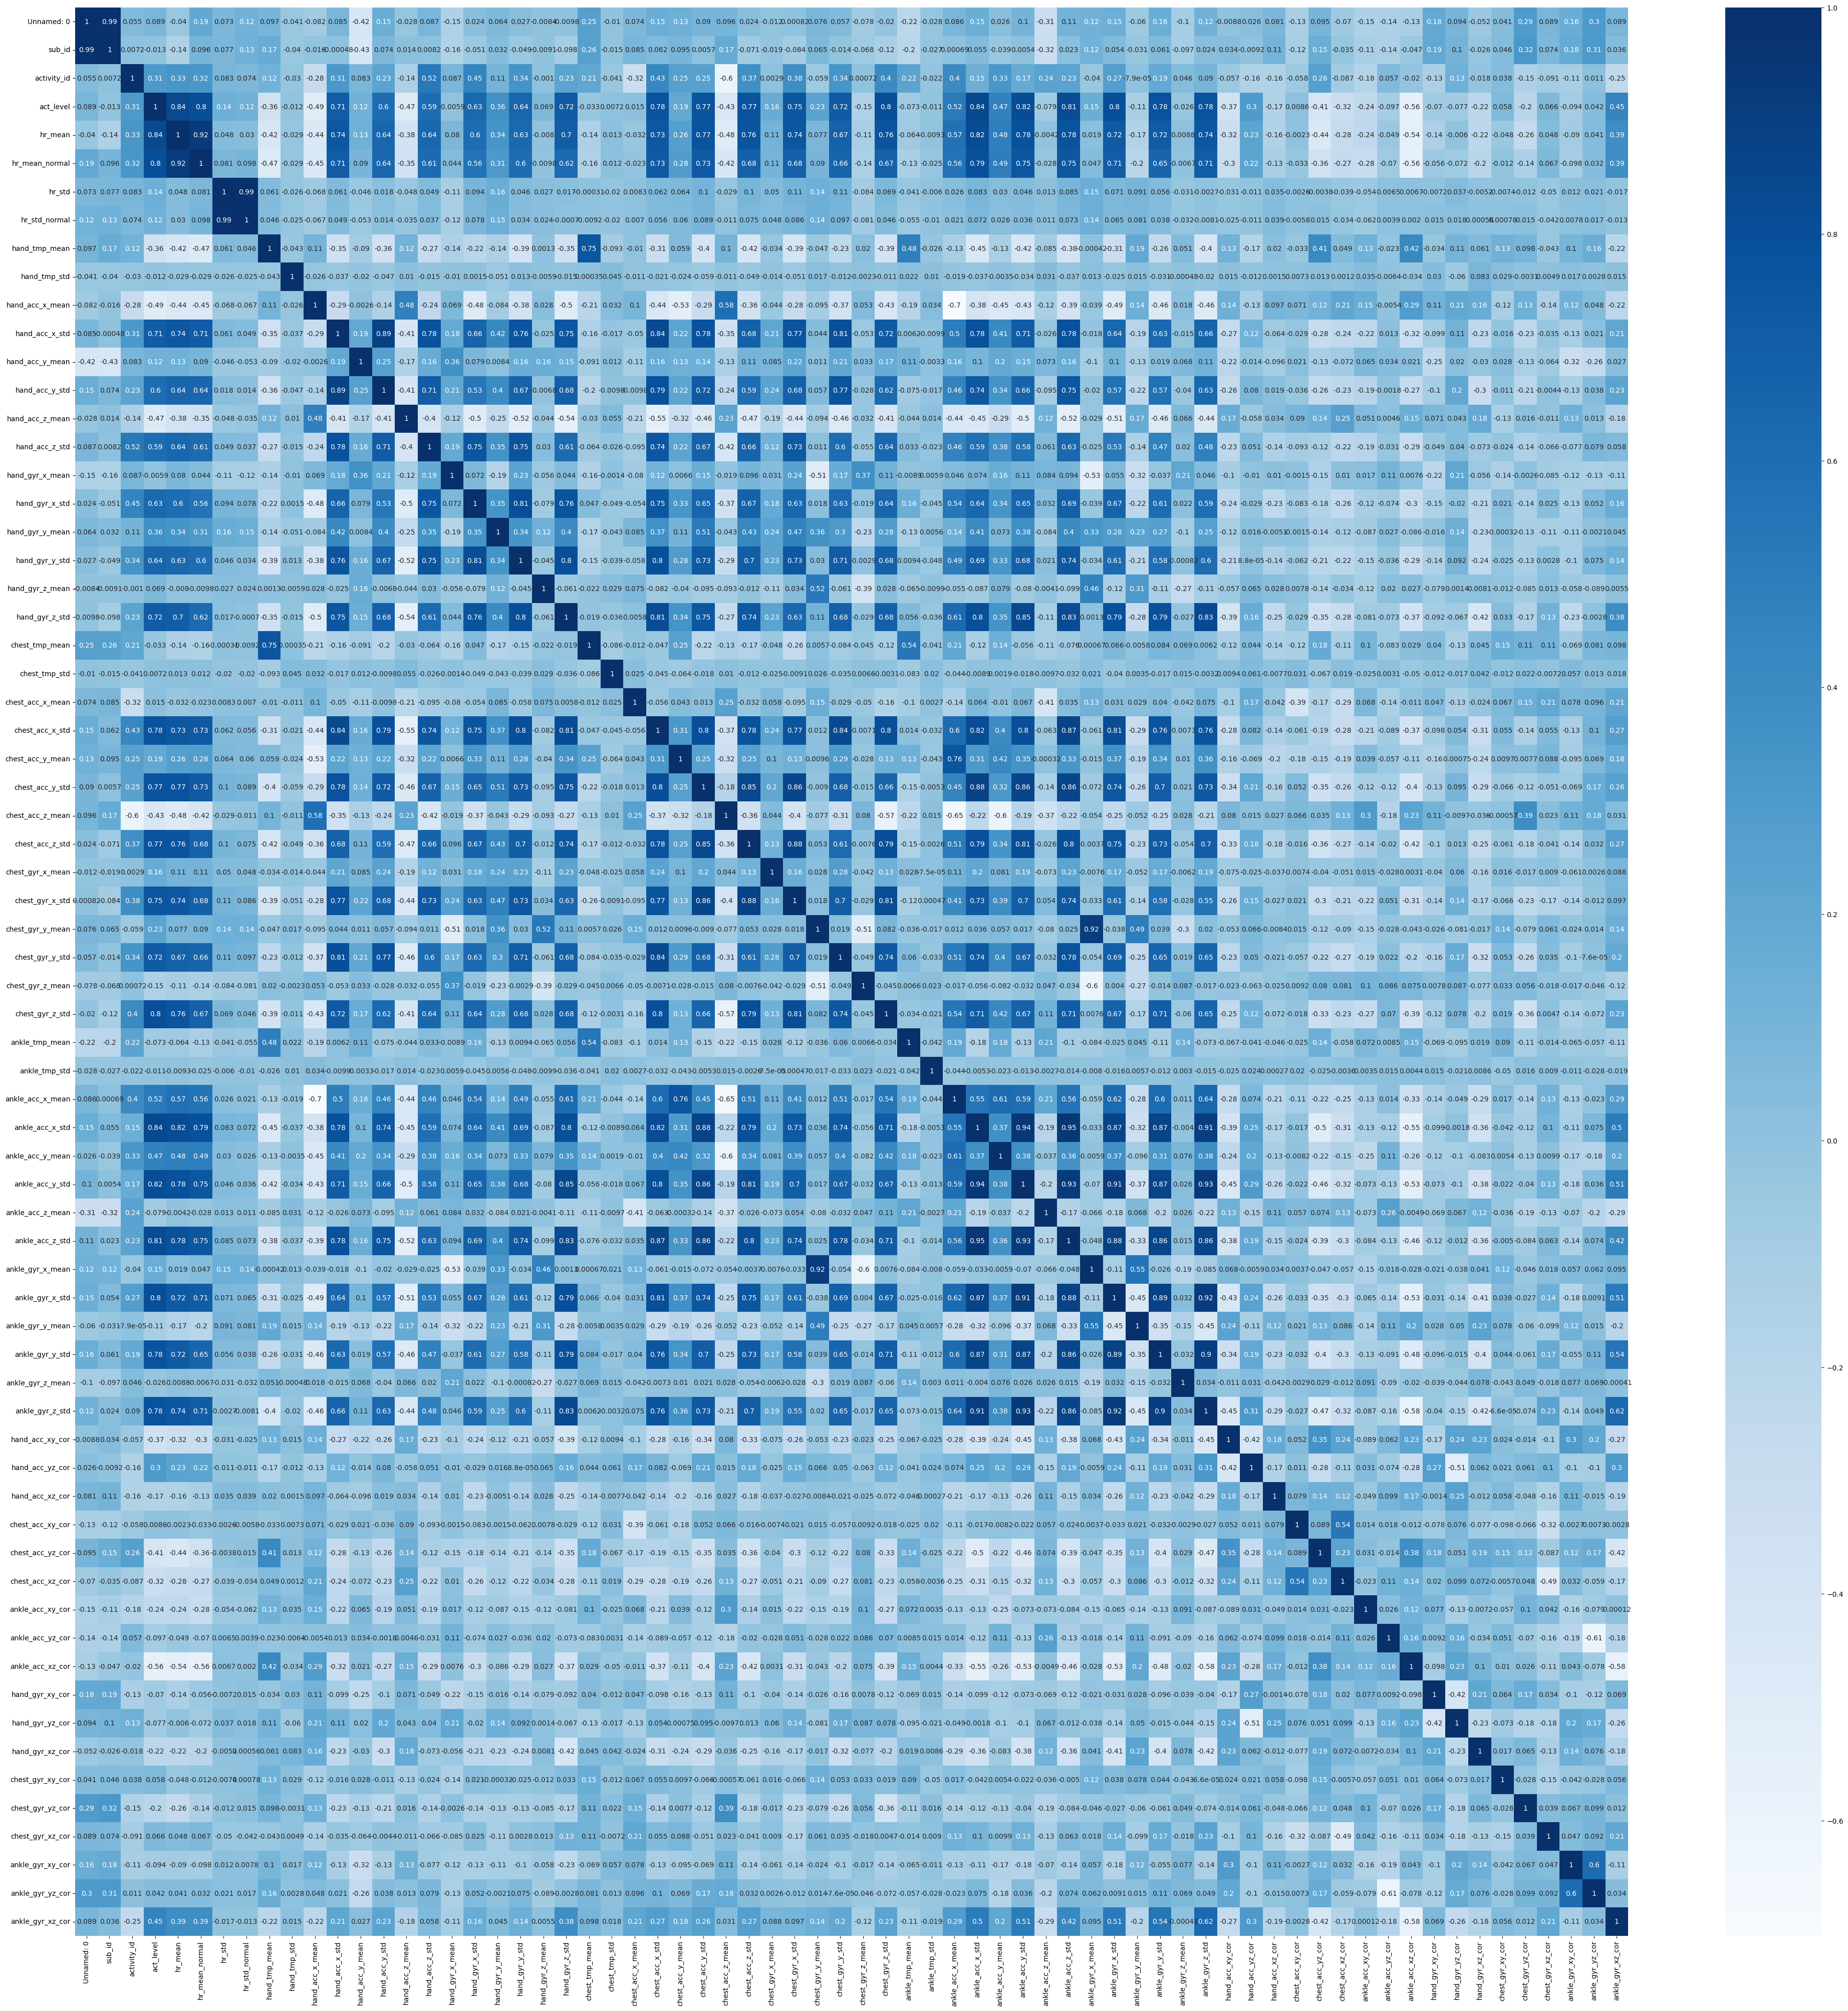

In [36]:
# heatmap visulization

plt.figure(figsize=(50, 50))

df_corr = df.corr()
sns.heatmap(df_corr, annot=True, cbar=True,
           cmap='Blues', annot_kws={"size": 10})
plt.show()

In [37]:
# 필요없는 열 제거

df = df.drop(['Unnamed: 0',
              'sub_id',
              'act_level',
              'hr_mean',
              'hr_mean_normal',
              'hr_std',
              'hr_std_normal'], axis = 1)

# PAMAP_input = df.drop(['activity_id'], axis = 1) 
# PAMAP_target = df['activity_id'] # activity_id를 예측하는 문제

# print (PAMAP_input.shape, PAMAP_target.shape)

In [38]:
# target에 포함된 요소들 확인하기

print (df['activity_id'].unique())


'''
    label이 0-based가 아니기 때문에 0-based로 바꾸어야 할 듯 하다.
    (labelencoding)
'''

[10  3  4  2  5  1  6  9  7  0  8 11]


'\n    label이 0-based가 아니기 때문에 0-based로 바꾸어야 할 듯 하다.\n    (labelencoding)\n'

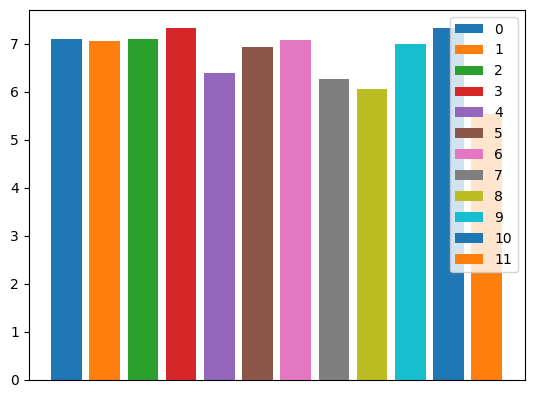

activity_id
10    1539
3     1525
2     1220
0     1203
6     1196
1     1162
9     1099
5     1035
4      593
7      522
8      428
11     251
Name: count, dtype: int64


In [39]:
# activity_id의 countplot, value_count

import math

target = np.unique(df['activity_id'])

# 시각화 진행

width = 1
for compo in target : 
    plt.bar(width, math.log(len(df[df['activity_id'] == compo])), 
            label=compo)
    width += 1
    
plt.xticks([], [])

plt.legend()
plt.show()

print (df['activity_id'].value_counts())

In [40]:

'''
    oversampling과 undersampling을 함수로 구현한다. 
'''
    
def sampling(df, target_col, max_size) :
    # 결과를 저장할 리스트 
    dfs = []
    
    for label in df[target_col].unique() :
        class_df = df[df[target_col] == label]
        
        if len(class_df) < max_size :
            # 샘플 수가 max_size보다 적으면 데이터를 복제하여 max_size로 만듦
            sampled_df = class_df.sample(max_size, replace=True, random_state=42)
        else :
            # 샘플 수가 max_size보다 많으면 앞부분부터 max_size만큼 선택함
            sampled_df = class_df.head(max_size)
        
        # 리스트에 추가
        dfs.append(sampled_df)
    
    df_resampled = pd.concat(dfs).reset_index(drop=True)
    
    return df_resampled

df_resampled = sampling(df, 'activity_id', max_size=5000)
print (df_resampled['activity_id'].value_counts())

activity_id
10    5000
3     5000
4     5000
2     5000
5     5000
1     5000
6     5000
9     5000
7     5000
0     5000
8     5000
11    5000
Name: count, dtype: int64


In [41]:
# Z-score normalization을 진행한다.

from sklearn.preprocessing import StandardScaler

X = df_resampled[[feature_name for feature_name in df_resampled.columns if feature_name != 'activity_id']]
y = df_resampled['activity_id']

SS = StandardScaler()
X = SS.fit_transform(X)

scaled_df = pd.DataFrame(data=X, 
                        columns = [feature_name for feature_name in df.columns if feature_name != 'activity_id'])
scaled_df['activity_id'] = y

scaled_df 

hand_tmp_mean  hand_tmp_std  hand_acc_x_mean  hand_acc_x_std  \
0           0.527898     -0.853221        -0.044816       -0.762108   
1           0.940570      1.182312         0.969473       -0.251097   
2           0.777537     -0.853221        -0.239336       -0.569838   
3           0.153440     -0.853221         0.147068       -0.235050   
4           0.559103     -0.853221         0.095370       -0.799334   
...              ...           ...              ...             ...   
59995      -1.157164     -0.853221        -0.186185        1.595995   
59996       0.654424      0.255789        -0.013637        1.293858   
59997      -1.157164     -0.853221        -0.373120        0.973337   
59998      -1.157164     -0.853221         0.022779        1.373668   
59999      -3.715962     -0.853221         0.763889        0.270761   

       hand_acc_y_mean  hand_acc_y_std  hand_acc_z_mean  hand_acc_z_std  \
0             0.765312       -0.482107        -0.127809       -0.314787   
1             0.644073       -0.333091         0.920250       -0.255443   
2            -0.270210       -0.148454         1.124756       -0.243076   
3             0.731867       -0.240622        -0.025017        0.333309   
4            -0.637938       -0.398449         1.607094       -0.818488   
...                ...             ...              ...             ...   
59995         1.033103        0.422174        -0.618533        1.417111   
59996         0.868660        1.220307        -0.881265        2.368193   
59997         0.866579        0.418600        -0.296487        1.566516   
59998         1.110390        0.472420        -0.472215        1.321416   
59999         1.220101        1.403727        -1.282617        1.885651   

       hand_gyr_x_mean  hand_gyr_x_std  ...  hand_gyr_xy_cor  hand_gyr_yz_cor  \
0            -0.122158       -0.189911  ...        -0.824033        -0.222055   
1             0.040868       -0.094257  ...        -0.313027         0.282719   
2            -0.199861        0.204090  ...        -1.923821         1.101581   
3            -0.158172        0.555950  ...        -1.024990         1.271741   
4            -0.020964       -0.872833  ...        -0.919179         1.011423   
...                ...             ...  ...              ...              ...   
59995         1.149277        0.895944  ...        -0.886228         0.889203   
59996         0.507456        2.254324  ...        -2.112127         0.448552   
59997         1.540726        0.776100  ...        -1.281992         0.251409   
59998         2.095630        0.855658  ...        -0.947146         0.355464   
59999         1.190166        0.689969  ...        -0.665361         0.948307   

       hand_gyr_xz_cor  chest_gyr_xy_cor  chest_gyr_yz_cor  chest_gyr_xz_cor  \
0             1.997304         -0.630104          0.117835          0.022973   
1             0.485668         -1.881466         -1.906989          2.781428   
2            -1.193029          0.710695         -0.923415         -0.725131   
3             0.629128          0.857113         -0.729675         -1.816482   
4            -1.602723         -1.764700         -0.352294          0.819493   
...                ...               ...               ...               ...   
59995         0.742467         -0.560718          0.459232         -2.538210   
59996        -0.585923         -1.075628          0.748718         -1.124648   
59997         0.635452         -0.379190          0.525027         -1.413541   
59998         1.106940          0.107769          0.407651         -1.402197   
59999        -0.943239          1.247373          0.759458          0.659836   

       ankle_gyr_xy_cor  ankle_gyr_yz_cor  ankle_gyr_xz_cor  activity_id  
0             -0.180623         -0.512241          0.422379           10  
1             -0.272818          0.470489         -0.559575           10  
2              0.560882         -0.556085         -1.607795           10  
3             -1.23

In [42]:
# train_df, test_df split

df_test = df.sample(frac=0.2, random_state=42)
df_train = df.drop(df_test.index)

print ("df_train shape:", df_train.shape)
print ("df_test shape:", df_test.shape)


df_train shape: (9418, 61)
df_test shape: (2355, 61)


In [43]:
'''
    아래 함수는 get_frames와 동일히 현재 x, y, z를 split하고, step(transformer에서는 hop_size)가 일종의 이동량의 역할을 한다.
    최종적으로는 split된 형태와 그에 맞는 target인 labels를 반환하고 있다.
    
    아래를 현재 데이터셋에 맞게끔 변형할 것이다. 다음 셀을 참고.
'''

def segments(df, time_steps, step, label_name):
    N_FEATURES = 8
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, step):
        xs = df['X'].values[i:i+time_steps]
        ys = df['Y'].values[i:i+time_steps]
        zs = df['Z'].values[i:i+time_steps]
        
        # Finding the most frequent label within the segment
        segment_labels = df[label_name][i:i+time_steps].values
        label = np.bincount(segment_labels).argmax()
        
        segments.append([xs, ys, zs])
        labels.append(label)
    
    reshaped_segments = np.asarray(segments, dtype=np.float32).reshape(-1, time_steps, N_FEATURES)
    labels = np.asarray(labels)
    
    return reshaped_segments, labels

In [44]:
# def segments(df, time_steps, step, label_name):
#     N_FEATURES = 3
#     segments = []
#     labels = []
#     for i in range(0, len(df) - time_steps, step):
#         xs = df['X'].values[i:i+time_steps]
#         ys = df['Y'].values[i:i+time_steps]
#         zs = df['Z'].values[i:i+time_steps]
        
#         # Finding the most frequent label within the segment
#         segment_labels = df[label_name][i:i+time_steps].values
#         label = np.bincount(segment_labels).argmax()
        
#         segments.append([xs, ys, zs])
#         labels.append(label)
    
#     reshaped_segments = np.asarray(segments, dtype=np.float32).reshape(-1, time_steps, N_FEATURES)
#     labels = np.asarray(labels)
    
#     return reshaped_segments, labels

import numpy as np

def segments(df, time_steps, step, label_name='activity_id') :
    N_FEATURES = df.shape[1] - 1  # label을 제외한 모든 feature 사용
    segments = []
    labels = []

    for i in range(0, len(df) - time_steps + 1, step):
        # 모든 feature를 가져옴
        segment_features = df.drop(columns=[label_name]).iloc[i: i + time_steps].values.T

        # 해당 구간의 레이블에서 가장 많이 나타나는 레이블 선택
        segment_labels = df[label_name][i:i + time_steps].values
        segment_labels = segment_labels.astype(int)  # 정수형으로 변환
        label = np.bincount(segment_labels).argmax()

        segments.append(segment_features)
        labels.append(label)

    # reshape
    reshaped_segments = np.asarray(segments, dtype=np.float32).reshape(-1, time_steps, N_FEATURES)
    labels = np.asarray(labels)

    return reshaped_segments, labels

In [59]:
# train set, test set split

TIME_PERIOD = 3
STEP_DISTANCE = 1
'''
    TIME_PERIOD : 일종의 df가 잘라지는 records 수
    STEP_DISTANCE : df가 잘라지고 이동하여 겹치는 량 
'''
LABEL = 'activity_id'

X_train, y_train = segments(df_train, TIME_PERIOD, STEP_DISTANCE, LABEL)
X_test, y_test = segments(df_test, TIME_PERIOD, STEP_DISTANCE, LABEL)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(9416, 3, 60) (9416,)
(2353, 3, 60) (2353,)


In [60]:
# one-hot encoding 

from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)
# y_val_seq_encoded = to_categorical(y_val_seq)

print(y_train[:5])  
print(y_train_encoded[:5]) 

print(y_test[:5])  
print(y_test_encoded[:5])

# print(y_val_seq[:5])  
# print(y_val_seq_encoded[:5])

[2 4 2 4 1]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0 6 5 5 3]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


-----

In [61]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (BatchNormalization, Conv1D, Activation, Flatten, Dense, 
                                     Reshape, TimeDistributed, MaxPooling1D, LSTM, Dropout, 
                                     Bidirectional, Input, GlobalAveragePooling1D, Concatenate, 
                                     MaxPool1D, Add)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.losses import CategoricalCrossentropy

In [62]:
# 다중 분류를 위해 softmax 도입, loss는 categorical crossentropy

out_activ = 'softmax'
out_loss = CategoricalCrossentropy()

In [63]:
# CNN 모델 정의

def cnn(x_shape,
        n_classes,
        filters,
        fc_hidden_nodes,
        learning_rate=0.01, regularization_rate=0.01,
        metrics=None):
    if metrics is None:
        metrics = ['accuracy']
    dim_length = x_shape[1]  # sample 
    dim_channels = x_shape[2]  # channel
    dim_output = n_classes
    weightinit = 'lecun_uniform'  # weight를 초기화하는 hyperparameter
    m = Sequential()

    # batchnormalization
    m.add(BatchNormalization(input_shape=(dim_length, dim_channels)))

    # 합성곱 -> batchnormalization -> ReLU Activation을 filter_number만큼 추가
    for filter_number in filters:
        m.add(Conv1D(filter_number, kernel_size=3, padding='same',
                     kernel_regularizer=l2(regularization_rate),
                     kernel_initializer=weightinit))
        m.add(BatchNormalization())
        m.add(Activation('relu'))

    # dense layer
    m.add(Flatten())
    m.add(Dense(units=fc_hidden_nodes,
                kernel_regularizer=l2(regularization_rate),
                kernel_initializer=weightinit))
    m.add(Activation('relu')) # 활성화 추가

    # 출력층
    m.add(Dense(units=dim_output, kernel_initializer=weightinit, kernel_regularizer=l2(regularization_rate)))
    m.add(BatchNormalization())
    m.add(Activation(out_activ)) # out_activ == softmax

    # compiling
    m.compile(loss=out_loss,
              optimizer=Adam(lr=learning_rate),
              metrics=metrics)

    return m

In [64]:
# CNN-LSTM 모델 정의

def cnn_lstm(x_shape,
             n_classes,
             n_hidden=128,
             learning_rate=0.01,
             n_steps=4,
             length=32,
             n_signals=9,
             regularization_rate=0.01,
             cnn_depth=3,
             lstm_depth=2,
             metrics=['accuracy']):
    """ CNN1D_LSTM 버전 1: 하나의 윈도우를 여러 작은 프레임으로 나누고, 각 프레임에 CNN 적용
    - 입력 데이터 형식: [None, n_frames, n_timesteps, n_signals]"""

    _input_shape = x_shape[1:]
    m = Sequential()

    # CNN에 맞는 reshape -> batchnormalization
    m.add(Reshape((n_steps, length, n_signals), input_shape=_input_shape))
    m.add(BatchNormalization())

    # TimeDistributed를 사용하여 CNN 적용하기
    m.add(TimeDistributed(Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')))
    m.add(TimeDistributed(Conv1D(filters=64, kernel_size=5, activation='relu')))
    m.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    m.add(TimeDistributed(Conv1D(filters=64, kernel_size=5, activation='relu')))
    m.add(TimeDistributed(Conv1D(filters=32, kernel_size=3, activation='relu')))
    m.add(TimeDistributed(MaxPooling1D(pool_size=2)))

    # LSTM 추가
    m.add(TimeDistributed(Flatten()))
    for _ in range(lstm_depth-1):
        m.add(LSTM(n_hidden, return_sequences=True, kernel_regularizer=l2(regularization_rate)))
    m.add(LSTM(n_hidden))
    m.add(Dropout(0.5))

    # 출력층
    m.add(Dense(100, activation='relu', kernel_regularizer=l2(regularization_rate)))
    m.add(Dense(n_classes, activation=out_activ))

    # compiling
    m.compile(loss=out_loss,
              optimizer=Adam(learning_rate=learning_rate, amsgrad=True),
              metrics=metrics)
    
    return m

In [65]:
# Vanilla LSTM 모델 정의

def vanilla_lstm(x_shape,
                 n_classes,
                 n_hidden=128,
                 learning_rate=0.01,
                 regularization_rate=0.01,
                 metrics=['accuracy']):
    """ 3D 데이터 요구: [n_samples, n_timesteps, n_signals]"""
    _input_shape = x_shape[1:]
    m = Sequential()

    # LSTM만 구성함 (vanilla)
    m.add(BatchNormalization(input_shape=_input_shape))
    m.add(LSTM(n_hidden))
    m.add(Dropout(0.3))

    # 출력층 
    m.add(Dense(100, activation='relu'))
    m.add(Dense(n_classes, activation=out_activ, kernel_regularizer=l2(regularization_rate)))

    # compiling
    m.compile(loss=out_loss,
              optimizer=Adam(learning_rate=learning_rate),
              metrics=metrics)
    return m

In [66]:
# Stacked LSTM 모델 정의

def stacked_lstm(x_shape,
                 n_classes,
                 n_hidden=128,
                 learning_rate=0.01,
                 regularization_rate=0.01,
                 depth=2,
                 metrics=['accuracy']):
    """ 3D 데이터 요구: [n_samples, n_timesteps, n_signals]"""
    _input_shape = x_shape[1:]
    m = Sequential()

    # dense
    m.add(BatchNormalization(input_shape=_input_shape))
    m.add(Dense(100, activation='relu', name='preprocess', kernel_regularizer=l2(regularization_rate)))

    # LSTM층을 2개 stack
    m.add(LSTM(n_hidden, return_sequences=True, kernel_regularizer=l2(regularization_rate)))
    m.add(Dropout(0.5))
    m.add(LSTM(n_hidden))

    # 출력층
    m.add(Dense(100, activation='relu'))
    m.add(Dense(n_classes, activation=out_activ, name="output"))

    # compiling
    m.compile(loss=out_loss,
              optimizer=Adam(learning_rate=learning_rate, amsgrad=True),
              metrics=metrics)
    return m


In [67]:
# BiLSTM 모델 정의

def bilstm(x_shape,
           n_classes,
           n_hidden=128,
           learning_rate=0.01,
           regularization_rate=0.01,
           merge_mode='concat', # concatenation함
           depth=2,
           metrics=['accuracy']):
    """ 3D 데이터 요구: [n_samples, n_timesteps, n_features]"""

    _input_shape = x_shape[1:]
    m = Sequential()

    # bidirectional하게 LSTM을 배치하고, merge함
    m.add(BatchNormalization(input_shape=_input_shape))
    m.add(Bidirectional(LSTM(n_hidden), merge_mode=merge_mode))

    # 출력층
    m.add(Dense(100, activation='relu', kernel_regularizer=l2(regularization_rate)))
    m.add(Dense(n_classes, activation=out_activ))

    # compiling
    m.compile(loss=out_loss,
              optimizer=Adam(learning_rate=learning_rate, amsgrad=True),
              metrics=metrics)

    return m

In [68]:
# iSPLInception 모델 정의

def ispl_inception(x_shape,
                   n_classes,
                   filters_number,
                   network_depth=5,
                   use_residual=True,
                   use_bottleneck=True,
                   max_kernel_size=20,
                   learning_rate=0.01,
                   bottleneck_size=32,
                   regularization_rate=0.01,
                   metrics=['accuracy']):
    dim_length = x_shape[1]  # sample
    dim_channels = x_shape[2]  # channel
    weightinit = 'lecun_uniform'  # weight initialization

    # Inception 정의
    def inception_module(input_tensor, stride=1, activation='relu'):

        # 채널 수가 1보다 큰 경우 Bottleneck 레이어 추가
        if use_bottleneck and int(input_tensor.shape[-1]) > 1:
            input_inception = Conv1D(filters=bottleneck_size,
                                     kernel_size=1,
                                     padding='same',
                                     activation=activation,
                                     kernel_initializer=weightinit,
                                     use_bias=False)(input_tensor)
        else:
            input_inception = input_tensor

        kernel_sizes = [max_kernel_size // (2 ** i) for i in range(3)]
        conv_list = [] # Conv layer를 담은 list

        # kernel을 여러개 추가하여 layer 추가 (Conv)
        for kernel_size in kernel_sizes:
            conv_list.append(Conv1D(filters=filters_number,
                                    kernel_size=kernel_size,
                                    strides=stride,
                                    padding='same',
                                    activation=activation,
                                    kernel_initializer=weightinit,
                                    kernel_regularizer=l2(regularization_rate),
                                    use_bias=False)(input_inception))

        # maxpooling layer 추가
        max_pool_1 = MaxPool1D(pool_size=3, strides=stride, padding='same')(input_tensor)

        # 1 * 1 conv layer 추가
        conv_last = Conv1D(filters=filters_number,
                           kernel_size=1,
                           padding='same',
                           activation=activation,
                           kernel_initializer=weightinit,
                           kernel_regularizer=l2(regularization_rate),
                           use_bias=False)(max_pool_1)

        conv_list.append(conv_last)

        # conv layer
        x = Concatenate(axis=2)(conv_list)
        x = BatchNormalization()(x)
        x = Activation(activation='relu')(x)
        return x

    # Residual 연결을 위하여 shortcut layer 추가함
    def shortcut_layer(input_tensor, out_tensor):
        shortcut_y = Conv1D(filters=int(out_tensor.shape[-1]),
                            kernel_size=1,
                            padding='same',
                            kernel_initializer=weightinit,
                            kernel_regularizer=l2(regularization_rate),
                            use_bias=False)(input_tensor)
        shortcut_y = BatchNormalization()(shortcut_y)

        x = Add()([shortcut_y, out_tensor])
        x = Activation('relu')(x)
        return x

    # modelling 
    input_layer = Input((dim_length, dim_channels))
    x = BatchNormalization()(input_layer)  # BatchNormalization 추가
    input_res = x

    # 네트워크 depth에 따른 Inception 모듈을 반복
    for depth in range(network_depth):
        x = inception_module(x)

        # Residual 연결을 3단계마다 추가 (연결을 위함)
        if use_residual and depth % 3 == 2:
            x = shortcut_layer(input_res, x)
            input_res = x

    # GlobalAveragePooling -> 출력층
    gap_layer = GlobalAveragePooling1D()(x)
    output_layer = Dense(n_classes, activation=out_activ,
                         kernel_initializer=weightinit, kernel_regularizer=l2(regularization_rate))(gap_layer)

    # compiling
    m = Model(inputs=input_layer, outputs=output_layer)
    m.compile(loss=out_loss,
              optimizer=Adam(learning_rate=learning_rate, amsgrad=True),
              metrics=metrics)

    return m


In [69]:
n_classes = len(df_train['activity_id'].unique())  # 클래스 개수

use_residual = True  # Residual(잔차) 연결 사용 여부

use_bottleneck = True  # Bottleneck(병목) 레이어 사용 여부

learning_rate = 0.0005  # 학습률

regularization_rate = 0.00593  # 정규화 비율

network_depth = 5  # 네트워크 깊이 (Inception 모듈 개수)

filters_number = 64  # 필터 수

max_kernel_size = 68  # 최대 커널 크기

out_activ = 'softmax'  # 출력 레이어 활성화 함수

out_loss = CategoricalCrossentropy()  # 출력 레이어 손실 함수

print(f"클래스 개수 (n_classes): {n_classes}")
print(f"Residual 연결 사용 여부 (use_residual): {use_residual}")
print(f"Bottleneck 레이어 사용 여부 (use_bottleneck): {use_bottleneck}")
print(f"학습률 (learning_rate): {learning_rate}")
print(f"정규화 비율 (regularization_rate): {regularization_rate}")
print(f"네트워크 깊이 (network_depth): {network_depth}")
print(f"필터 수 (filters_number): {filters_number}")
print(f"최대 커널 크기 (max_kernel_size): {max_kernel_size}")
print(f"출력 레이어 활성화 함수 (out_activ): {out_activ}")
print(f"출력 레이어 손실 함수 (out_loss): {out_loss}")

'''
    기존 out_loss의 reduction은 auto (시스템에 의한 자동)으로 되었으나 'none'으로 변경함 (기본값)
'''

클래스 개수 (n_classes): 12
Residual 연결 사용 여부 (use_residual): True
Bottleneck 레이어 사용 여부 (use_bottleneck): True
학습률 (learning_rate): 0.0005
정규화 비율 (regularization_rate): 0.00593
네트워크 깊이 (network_depth): 5
필터 수 (filters_number): 64
최대 커널 크기 (max_kernel_size): 68
출력 레이어 활성화 함수 (out_activ): softmax
출력 레이어 손실 함수 (out_loss): <keras.src.losses.losses.CategoricalCrossentropy object at 0x138c6ab10>


"\n    기존 out_loss의 reduction은 auto (시스템에 의한 자동)으로 되었으나 'none'으로 변경함 (기본값)\n"

In [70]:
# modeling

iSLPInception = ispl_inception(X_train.shape, n_classes, filters_number, network_depth=5,
                   use_residual=True,
                   use_bottleneck=True,
                   max_kernel_size=20,
                   learning_rate=0.01,
                   bottleneck_size=32,
                   regularization_rate=0.01,
                   metrics=['accuracy'])

iSLPInception.summary()
keras.utils.plot_model(iSLPInception, 
                      show_dtype=True,
                      show_layer_activations=True,
                      show_layer_names=True,
                      show_shapes=True,
                      show_trainable=True)

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 3, 60)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 3, 60)     │        240 │ input_layer_2[0]… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_52 (Conv1D)  │ (None, 3, 32)     │      1,920 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_10    │ (None, 3, 60)     │          0 │ batch_normalizat… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_53 (Conv1D)  │ (None, 3, 64)     │     40,960 │ conv1d_52[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_54 (Conv1D)  │ (None, 3, 64)     │     20,480 │ conv1d_52[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_55 (Conv1D)  │ (None, 3, 64)     │     10,240 │ conv1d_52[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_56 (Conv1D)  │ (None, 3, 64)     │      3,840 │ max_pooling1d_10… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_10      │ (None, 3, 256)    │          0 │ conv1d_53[0][0],  │
│ (Concatenate)       │                   │            │ conv1d_54[0][0],  │
│                     │                   │            │ conv1d_55[0][0],  │
│                     │                   │            │ conv1d_56[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 3, 256)    │      1,024 │ concatenate_10[0… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_12       │ (None, 3, 256)    │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_57 (Conv1D)  │ (None, 3, 32)     │      8,192 │ activation_12[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_11    │ (None, 3, 256)    │          0 │ activation_12[0]… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_58 (Conv1D)  │ (None, 3, 64)     │     40,960 │ conv1d_57[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_59 (Conv1D)  │ (None, 3, 64)     │     20,480 │ conv1d_57[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_60 (Conv1D)  │ (None, 3, 64)     │     10,240 │ conv1d_57[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_61 (Conv1D)  │ (None, 3, 64)     │     16,384 │ max_pooling1d_11… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_11      │ (None, 3, 256)    │          0 │ conv1d_58[0][0],  │
│ (Concatenate)       │                   │            │ conv1d_59[0][0],  │
│                     │                   │            │ conv1d_60[0][0],  │
│                     │                   │            │ conv1d_61[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 3, 256)    │      1,024 │ concatenate_11[0

 Total params: 487,292 (1.86 MB)

 Trainable params: 484,100 (1.85 MB)

 Non-trainable params: 3,192 (12.47 KB)

In [71]:
# compile

optimizer = keras.optimizers.Adam(learning_rate=0.0001)
iSLPInception.compile (optimizer=optimizer, 
               loss='categorical_crossentropy', 
               metrics=['accuracy'])

In [72]:
# fit

from memory_profiler import profile

@profile # 메모리 오버플로우로 인한 시스템 다운을 막기 위해서
def train_model(model, X, y) :
    early_stopping_cb = keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True)
    
    history = model.fit(X, y, epochs=50, 
                        validation_split=0.2,
                        batch_size=256,
                        callbacks=[early_stopping_cb], 
                        verbose=True, shuffle=True)
    
    return history

history = train_model(iSLPInception, X_train, y_train_encoded)


ERROR: Could not find file /var/folders/_z/gryfr07n59jgb3wrd062h1ym0000gn/T/ipykernel_23214/2905967801.py
Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 123ms/step - accuracy: 0.1893 - loss: 17.6914 - val_accuracy: 0.2489 - val_loss: 17.0862
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.4090 - loss: 16.4534 - val_accuracy: 0.3307 - val_loss: 16.3591
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.5293 - loss: 15.4642 - val_accuracy: 0.4108 - val_loss: 15.6941
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.5898 - loss: 14.5928 - val_accuracy: 0.4459 - val_loss: 15.0558
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.6238 - loss: 13.8151 - val_accuracy: 0.4480 - val_loss: 14.4477
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.6527 - loss: 13.0883 - val_accuracy: 0.4655 - val_loss: 13.8686
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.6846 - loss: 12.4498 - val_accuracy: 0.4671 - val_los

{'accuracy': [0.2526553273200989, 0.43799787759780884, 0.5400955677032471, 0.5946627855300903, 0.6290493607521057, 0.6570631861686707, 0.6841476559638977, 0.7028677463531494, 0.7295538783073425, 0.7510621547698975, 0.772437572479248, 0.7877057790756226, 0.8077535629272461, 0.8288635015487671, 0.8402814865112305, 0.8546202778816223, 0.8664365410804749, 0.8798459768295288, 0.894848644733429, 0.9017525315284729, 0.912506639957428, 0.926712691783905, 0.9365374445915222, 0.9427774548530579, 0.9466277360916138, 0.9533988237380981, 0.9581784605979919, 0.9617631435394287, 0.968932569026947, 0.9703930020332336, 0.9751725792884827, 0.9783589839935303, 0.9827402830123901, 0.9844662547111511, 0.985793948173523, 0.9860594868659973, 0.9875199198722839, 0.9901752471923828, 0.9889803528785706, 0.9924322962760925, 0.9916356801986694, 0.9941582679748535, 0.9932289123535156, 0.9942910075187683, 0.9942910075187683, 0.9944238066673279, 0.9954859018325806, 0.9964153170585632, 0.9961497783660889, 0.997477412

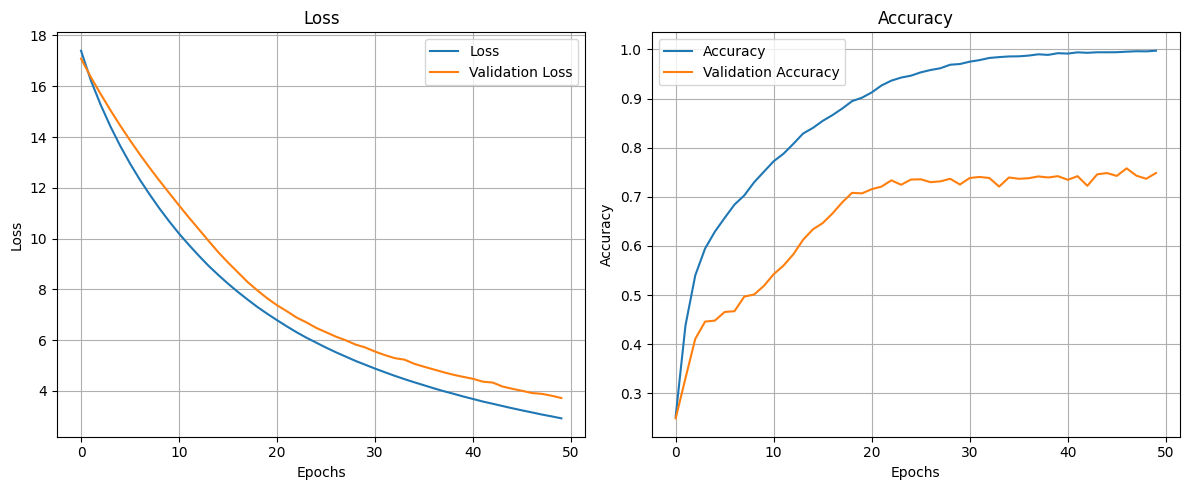

In [73]:
# loss와 validation loss, acc와 validation acc를 시각화하기 위한 메소드

print (history.history)

def draw_history (history) :
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    ax[0].plot(history.history['loss'], label='Loss')
    ax[0].plot(history.history['val_loss'], label='Validation Loss')
    ax[0].set_title('Loss')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].legend()
    ax[0].grid()

    ax[1].plot(history.history['accuracy'], label='Accuracy')
    ax[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax[1].set_title('Accuracy')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend()
    ax[1].grid()

    plt.tight_layout()
    plt.show()

draw_history(history)

In [75]:
# evaulate

print ("train score : ", iSLPInception.evaluate(X_train, y_train_encoded))
print ("test score : ", iSLPInception.evaluate(X_test, y_test_encoded))

eval = iSLPInception.evaluate(X_test, y_test_encoded)

print(eval)

295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9929 - loss: 2.9130
train score :  [3.0607876777648926, 0.9487043619155884]
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7608 - loss: 3.6621
test score :  [3.6866869926452637, 0.7484062910079956]
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7608 - loss: 3.6621
[3.6866869926452637, 0.7484062910079956]


74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Confusion Matrix


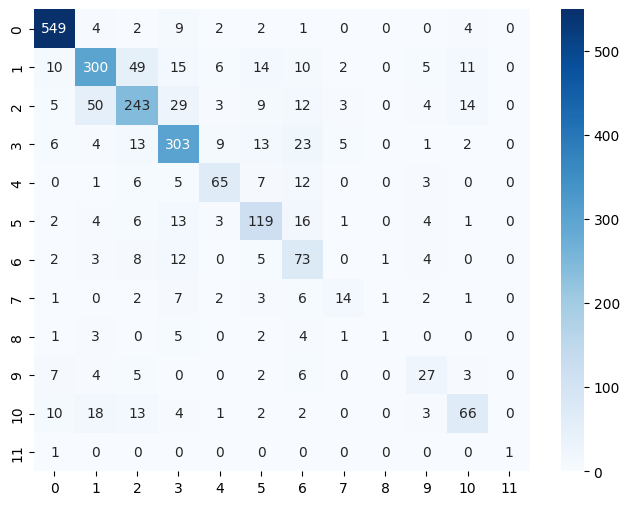

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       573
           1       0.77      0.71      0.74       422
           2       0.70      0.65      0.68       372
           3       0.75      0.80      0.78       379
           4       0.71      0.66      0.68        99
           5       0.67      0.70      0.69       169
           6       0.44      0.68      0.53       108
           7       0.54      0.36      0.43        39
           8       0.33      0.06      0.10        17
           9       0.51      0.50      0.50        54
          10       0.65      0.55      0.60       119
          11       1.00      0.50      0.67         2

    accuracy                           0.75      2353
   macro avg       0.67      0.59      0.61      2353
weighted avg       0.75      0.75      0.75      2353



In [81]:
# confusion matrix, classification report, accuracy

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

y_test_arg = np.argmax(y_test_encoded, axis=1)
Y_pred = np.argmax(iSLPInception.predict(X_test) ,axis=1)
print ('Confusion Matrix')
cm = confusion_matrix(y_test_arg, Y_pred)

# confusion matrix 시각화
plt.figure(figsize=(8, 6))  # 그래프 크기 조절 (너비 8, 높이 6)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.show()

# classification report
report = classification_report(y_test_arg, Y_pred)
print (report)

In [82]:
# 모델 저장

from tensorflow.keras.models import save_model

def save_trained_model(model, model_name, dataset_name) :
    # 모델 저장 경로 설정
    model_dir = './model'
    os.makedirs(model_dir, exist_ok=True)
    
    # 모델 파일 경로
    model_name = f"{model_name}_{dataset_name}.h5"  # 모델 이름과 데이터셋 이름 조합
    model_path = os.path.join(model_dir, model_name)
    
    # 모델 저장
    save_model(model, model_path)
    print(f'Model saved at {model_path}')

save_trained_model(iSLPInception, "iSLPInception", "PAMAP")

Model saved at ./model/iSLPInception_PAMAP.h5
